# Python for Researchers
[www.pythonforresearchers.com](http://pythonforresearchers.com)

[@py4res](https://twitter.com/py4res)

## Data handling and visualisation mini series

1. Getting data direct from the web
2. Plotting data (using Matplotlib)
3. Making your plot look awesome
4. Making your plot interactive (Plotly)
5. Cool Jupyter Notebook functionality

## You are going to make this!

<img src="world_population.png">

## Part 1: Getting data direct from the web

In [1]:
# import pandas
import pandas as pd
URL = "https://en.wikipedia.org/wiki/World_population"

In [2]:
# Read data into pandas datafrom direct from the web
df = pd.read_html(URL, header=0, index_col=0)[8]
df

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
Region,,,,,,,,,,,,,,
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
North America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


In [3]:
# Filter the columns - historical data only
df_filtered = df[df.columns[0:12]]
df_filtered

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
Region,,,,,,,,,,,,
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603
North America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [4]:
# Tidy up index
index = df_filtered.index.values
df_filtered.index = [x.replace("[Note 1]", "") for x in index]
df_filtered

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America,40,20,10,16,24,38,74,167,508,577,590,603
North America,6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [5]:
# Sort table according to 2012 population
df_filtered.sort_values(by=["2012"], ascending=False)

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America,40,20,10,16,24,38,74,167,508,577,590,603
North America,6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [6]:
# Save table to excel spreadsheet
df_filtered.to_excel("world_population.xlsx")

## Part 2: Generating a basic plot (using Matplotlib)

In [38]:
# import matplotlib
import matplotlib.pyplot as plt

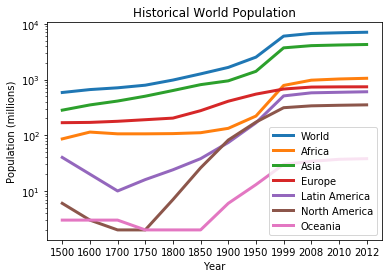

In [51]:
# Setup figure and axis
fig, ax = plt.subplots()

# Plot each row as a line
for row in df_filtered.iterrows():
    ax.plot(row[1], label=row[0], linewidth=3)
    
# Set title and axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('Historical World Population')

# Include a legend
ax.legend()

# Use a logarithmic y scale
ax.set_yscale("log")

plt.show()
